In [1]:
import sys
import numpy as np
from package.filtredcells import *
from itertools import product
from package.tessellations import *
from matplotlib import colormaps as cm

# Cube Tessellation on Torus 2d

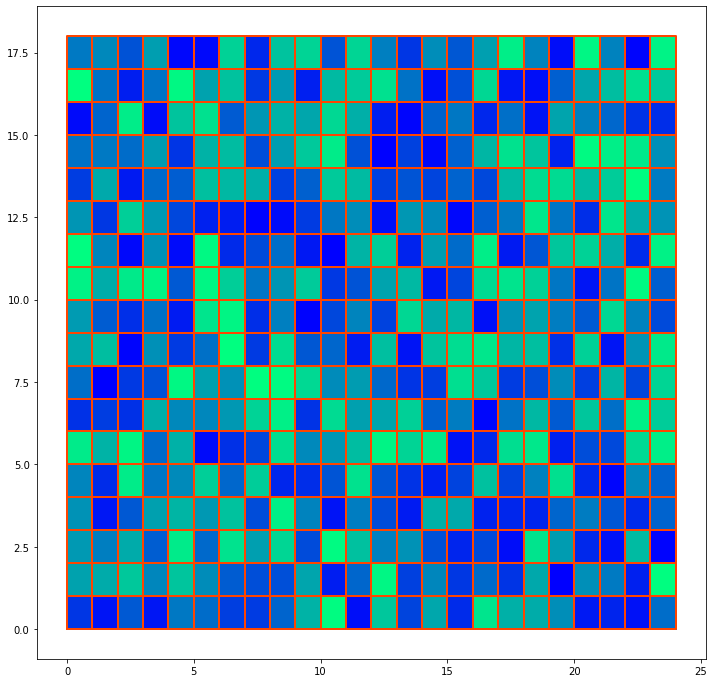

48


In [2]:
n, m = 24, 18
filtration = np.arange(n*m) / (n*m-1)
np.random.shuffle(filtration)
fc = get_cubical_tessellation_on_torus2d(n, m, filtration=filtration)

plt.figure(figsize=(12, 12))
fc.draw_filtration()
plt.show()

fc.initialize_complex(dimension=3)
fc.get_giant_cycles()

print(sys.getsizeof(fc))

# Hexagonal Tessellation on Torus 2d

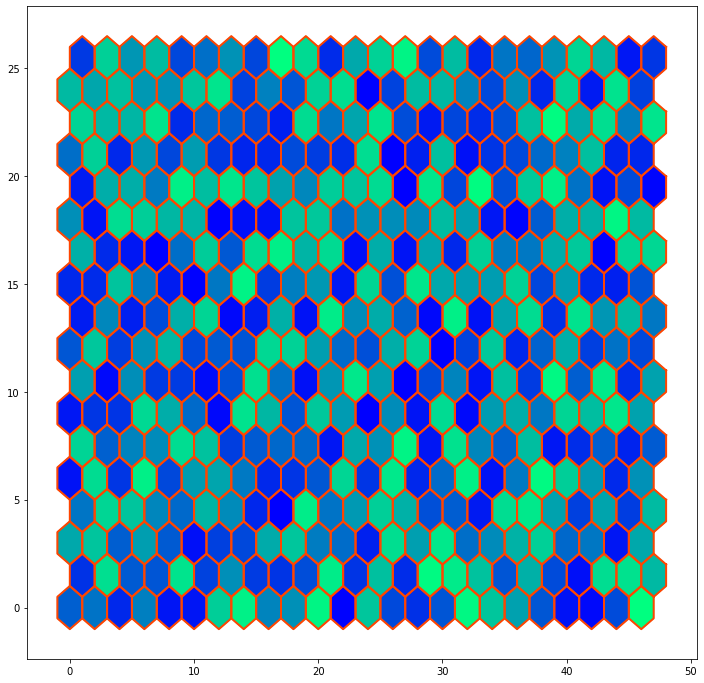

,Birth,Dimension
130,0.003011,0
131,0.471963,1
132,0.588286,1
133,0.999101,2


In [3]:
n, m, d = 24, 18, 9
filtration = np.random.random(n*m)
fc = get_hexagonal_tessolation_on_torus2d(n, m, d, filtration=filtration)

plt.figure(figsize=(12, 12))
fc.draw_filtration()
plt.show()

fc.initialize_complex(dimension=3)
fc.get_giant_cycles()

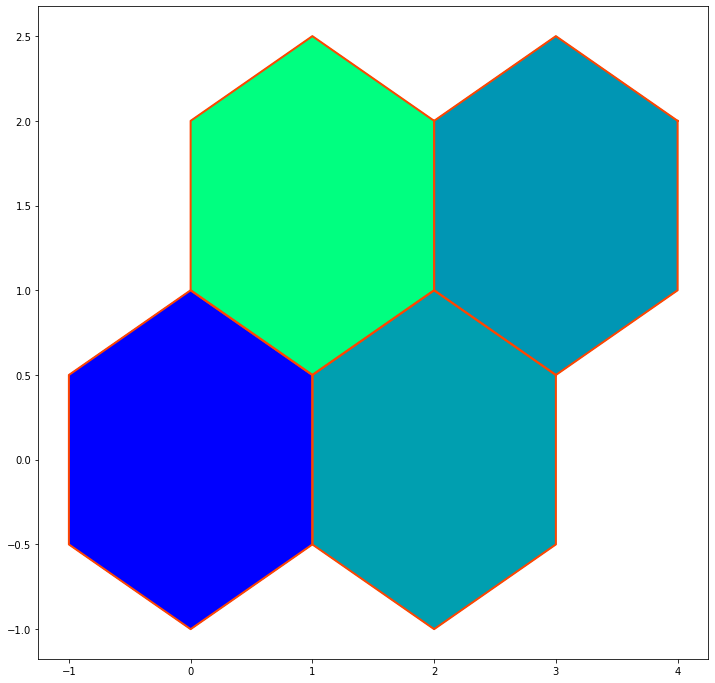

,Birth,Dimension
0,0.143046,0
1,0.574248,2
2,0.833944,2
3,0.833944,2
4,0.833944,2
5,0.833944,2


In [4]:
n = 2
filtration = np.random.random(n*n)
fc = get_hexagonal_tessolation_on_torus2d(n, filtration=filtration)

plt.figure(figsize=(12, 12))
fc.draw_filtration()
plt.show()

fc.initialize_complex(dimension=3)
fc.get_giant_cycles()

# Triangle Tessellation on Torus 2d

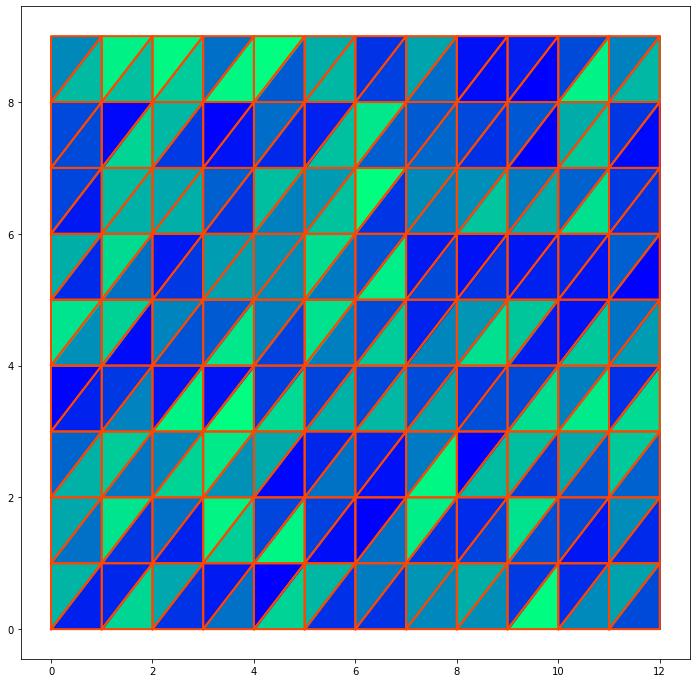

,Birth,Dimension
73,0.004725,0
74,0.269159,1
75,0.295300,1
76,0.998878,2


In [5]:
n, m = 12, 9
filtration = np.random.random(2*n*m)
fc = get_triangle_tessolation_on_torus2d(n, m, filtration=filtration)

plt.figure(figsize=(12, 12))
fc.draw_filtration()
plt.show()

fc.initialize_complex(dimension=3)
fc.get_giant_cycles()

# Cube Tessellation on Torus 3d

In [6]:
n, m, k = 10, 10, 10
filtration = np.arange(n*m*k) / (n*m*k)
fc = get_cubical_tessellation_on_torus3d(n, m, k, filtration=filtration)

fc.initialize_complex(dimension=4)
fc.get_giant_cycles()

,Birth,Dimension
0,0.000,0
1,0.009,1
2,0.090,1
3,0.099,2
4,0.900,1
5,0.909,2
6,0.990,2
7,0.999,3


# Hexogonal Tessellation on Torus 3d

In [7]:
from itertools import product

In [8]:
def get_hexogonal_tessellation_on_torus3d(n: int, filtration=None):
    """
    Returns FiltredCells for octehedron tessellation on 3-dimensionall torus.
    Truely octahedron tessellation is not possible. So that tesselation will have a lot of 2-dim giant cycles.
    
    Parameters:
    -----------
    n : int
        Half sizes of tessellation
    filtration : array length 4*n*m*k or None
        Filtration values for cells. If that's None, that becames zeros.
        
    Returns:
    --------
    fc : FiltredCells
    """
    centers = np.array(list(product(np.arange(-n+1, n), repeat=4)))
    centers = 2*centers[centers.sum(axis=1) == 0]
    pass


In [9]:
get_hexogonal_tessellation_on_torus3d(3)


In [10]:
unit_simplices = np.array(list(product(np.arange(-1, 2), repeat=4)))
unit_simplices = unit_simplices[unit_simplices.sum(axis=1) == 0]
unit_simplices = unit_simplices[abs(unit_simplices).sum(axis=1) == 2]

unit_simplices

array([[-1,  0,  0,  1],
       [-1,  0,  1,  0],
       [-1,  1,  0,  0],
       [ 0, -1,  0,  1],
       [ 0, -1,  1,  0],
       [ 0,  0, -1,  1],
       [ 0,  0,  1, -1],
       [ 0,  1, -1,  0],
       [ 0,  1,  0, -1],
       [ 1, -1,  0,  0],
       [ 1,  0, -1,  0],
       [ 1,  0,  0, -1]])

# FCC
## Lattice $D_3$ Tessellation on Torus 3d

In [11]:
n, m, k = 3, 5 ,4
#filtration = np.arange(4*n*m*k) / (4*n*m*k)
filtration = np.random.random(4*n*m*k)

fc = get_fcc_tessellation_on_torus3d(n, m, k, filtration=filtration)
fc.initialize_complex(dimension=4)
info = fc.get_cycle_info()
fc.get_giant_cycles()

,Birth,Dimension
72,0.007553,0
73,0.113599,1
74,0.178791,1
75,0.178791,1
76,0.806467,2
77,0.817040,2
78,0.896676,2
79,0.993621,3


In [12]:
info[info['Death'] != np.inf].groupby('Dimension').agg({'Dimension': ['count'],
                                                          'Birth': ['mean', 'var'], 
                                                          'Death': ['mean', 'var']})

Dimension     Birth               Death          
              count      mean       var      mean       var
Dimension                                                  
0                10  0.030785  0.000163  0.119092  0.003613
1                47  0.361548  0.011374  0.591494  0.017748
2                15  0.847961  0.006064  0.949122  0.002757

In [13]:
info2 = info[(info['Death'] == np.inf)&(info['Dimension'] == 2)]['Birth'].values
info2 = pd.DataFrame([[i,(info2 == i).sum()] for i in np.unique(info2)], columns=['Birth', 'Count'])
assert (info2.groupby('Count').count().index.values * info2.groupby('Count').count()['Birth'].values).sum() == len(info[(info['Death'] == np.inf)&(info['Dimension'] == 2)])
info2.groupby('Count').count().transpose()

Count,1
Birth,3


/usr/local/lib64/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib64/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/tmp/ipykernel_79154/3786776456.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/usr/local/lib64/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


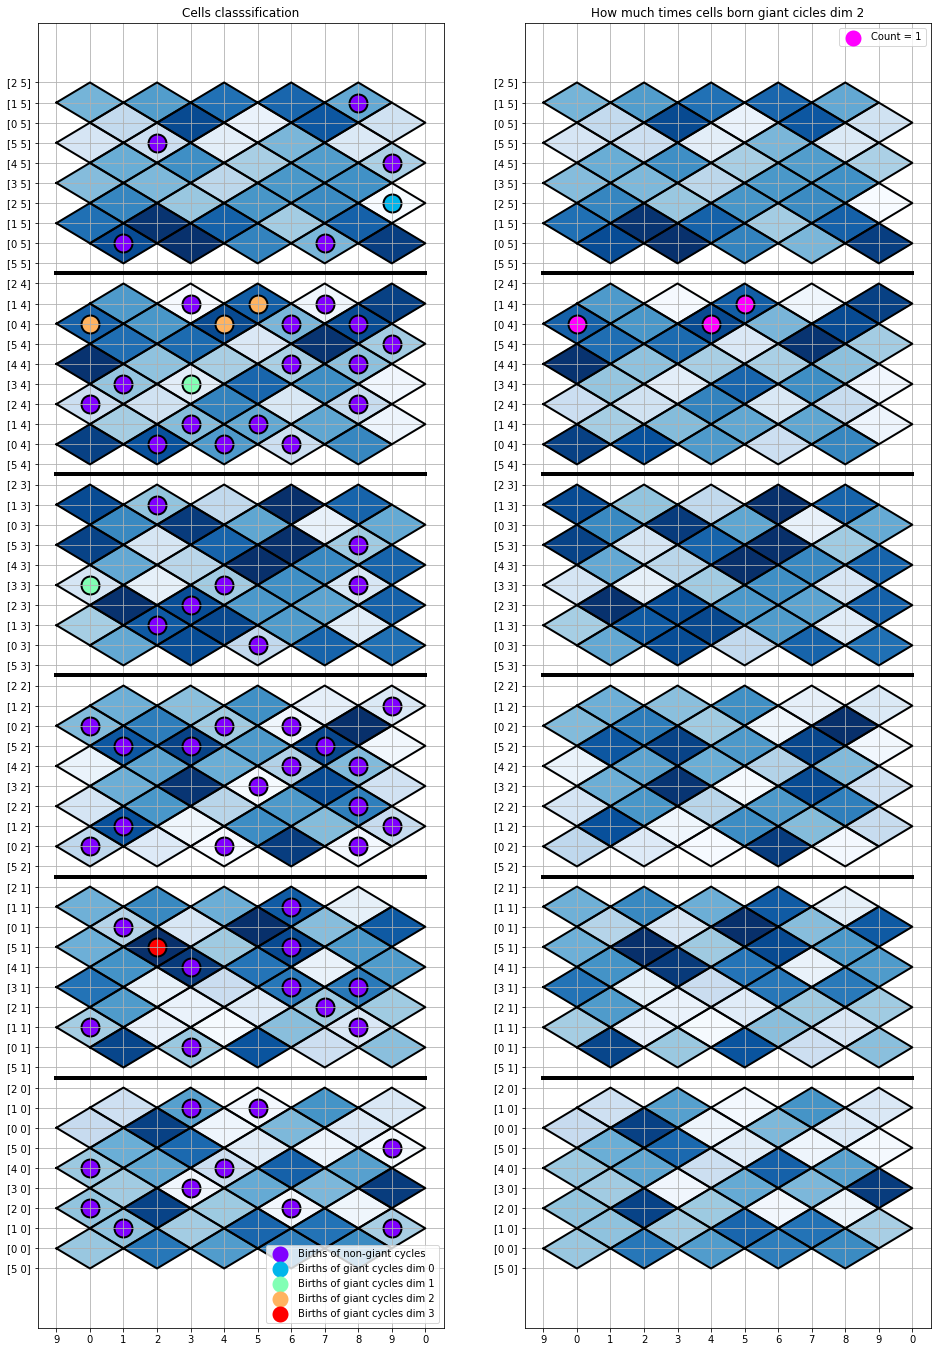

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16,24))

# Cells classsification

fc.draw_filtration(colormap='Blues', edgecolor='black', ax=axs[0])
axs[0].set_title('Cells classsification')

axs[0].set_xticks(np.arange(-1, 2*m+1), np.arange(-1, 2*m+1)%(2*m))
axs[0].set_yticks(fc.yticks, fc.ylabels % np.array([2*n, 2*k]))

colors = np.arange(5)/4
colors = [cm['rainbow'](i) for i in colors]

x, y = fc.cords[np.isin(filtration, info[(info['Death'] != np.inf)]['Birth'].values)].mean(axis=1).transpose()
axs[0].scatter(x, y, color='black', linewidth=14)
axs[0].scatter(x, y, color=colors[0], linewidth=10, label='Births of non-giant cycles')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 0)]['Birth'].values)].mean(axis=1).transpose()
axs[0].scatter(x, y, color='black', linewidth=14)
axs[0].scatter(x, y, color=colors[1], linewidth=10, label='Births of giant cycles dim 0')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 1)]['Birth'].values)].mean(axis=1).transpose()
axs[0].scatter(x, y, color='black', linewidth=14)
axs[0].scatter(x, y, color=colors[2], linewidth=10, label='Births of giant cycles dim 1')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 2)]['Birth'].values)].mean(axis=1).transpose()
axs[0].scatter(x, y, color='black', linewidth=14)
axs[0].scatter(x, y, color=colors[3], linewidth=10, label='Births of giant cycles dim 2')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 3)]['Birth'].values)].mean(axis=1).transpose()
axs[0].scatter(x, y, color='black', linewidth=14)
axs[0].scatter(x, y, color=colors[4], linewidth=10, label='Births of giant cycles dim 3')

for i in range(2*n - 1):
    axs[0].plot([-1, 2*m], np.ones(2)*2*i*(k+1) + 2*k + 0.5, color='black', linewidth=4)
    
axs[0].legend()
axs[0].grid(True)

# How much times cells born giant cicles dim 2

axs[1].set_title('How much times cells born giant cicles dim 2')
fc.draw_filtration(colormap='Blues', edgecolor='black', ax=axs[1])

axs[1].set_xticks(np.arange(-1, 2*m+1), np.arange(-1, 2*m+1)%(2*m))
axs[1].set_yticks(fc.yticks, fc.ylabels % np.array([2*n, 2*k]))

counts = np.unique(info2['Count'])
colors = np.arange(len(counts)) / max(1, len(counts)-1)
colors = [cm['spring'](i) for i in colors]
for i in range(len(counts)):
    x, y = fc.cords[np.isin(filtration, info2[(info2['Count'] == counts[i])]['Birth'].values)].mean(axis=1).transpose()
    axs[1].scatter(x, y, color='black', linewidth=14)
    axs[1].scatter(x, y, facecolor=colors[i], linewidth=10, label='Count = {0}'.format(counts[i]))

for i in range((2*n - 1)):
    axs[1].plot([-1, 2*m], np.ones(2)*2*i*(k+1) + 2*k + 0.5, color='black', linewidth=4)
    
axs[1].legend()
axs[1].grid(True)
fig.show()

# BCC
## Lattice $D_3^*$ Tessellation on Torus 3d

In [15]:
n, m = 3, 4
k = 2*m
filtration = np.random.random(n*m*k)
filtration = np.arange(n*m*k)
tess = get_bcc_tessellation_on_torus3d(n=n, m=m, filtration=filtration)
tess.initialize_complex()
df_gc = tess.get_giant_cycles()
df_gc

/home/fedor/Jupyter/topological-data-serial-experiments/package/tessellations.py:332: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cords.append(np.array(that_cords))


,Birth,Dimension
0,0.0,0
1,7.0,1
2,24.0,1
3,31.0,2
4,64.0,1
5,71.0,2
6,88.0,2


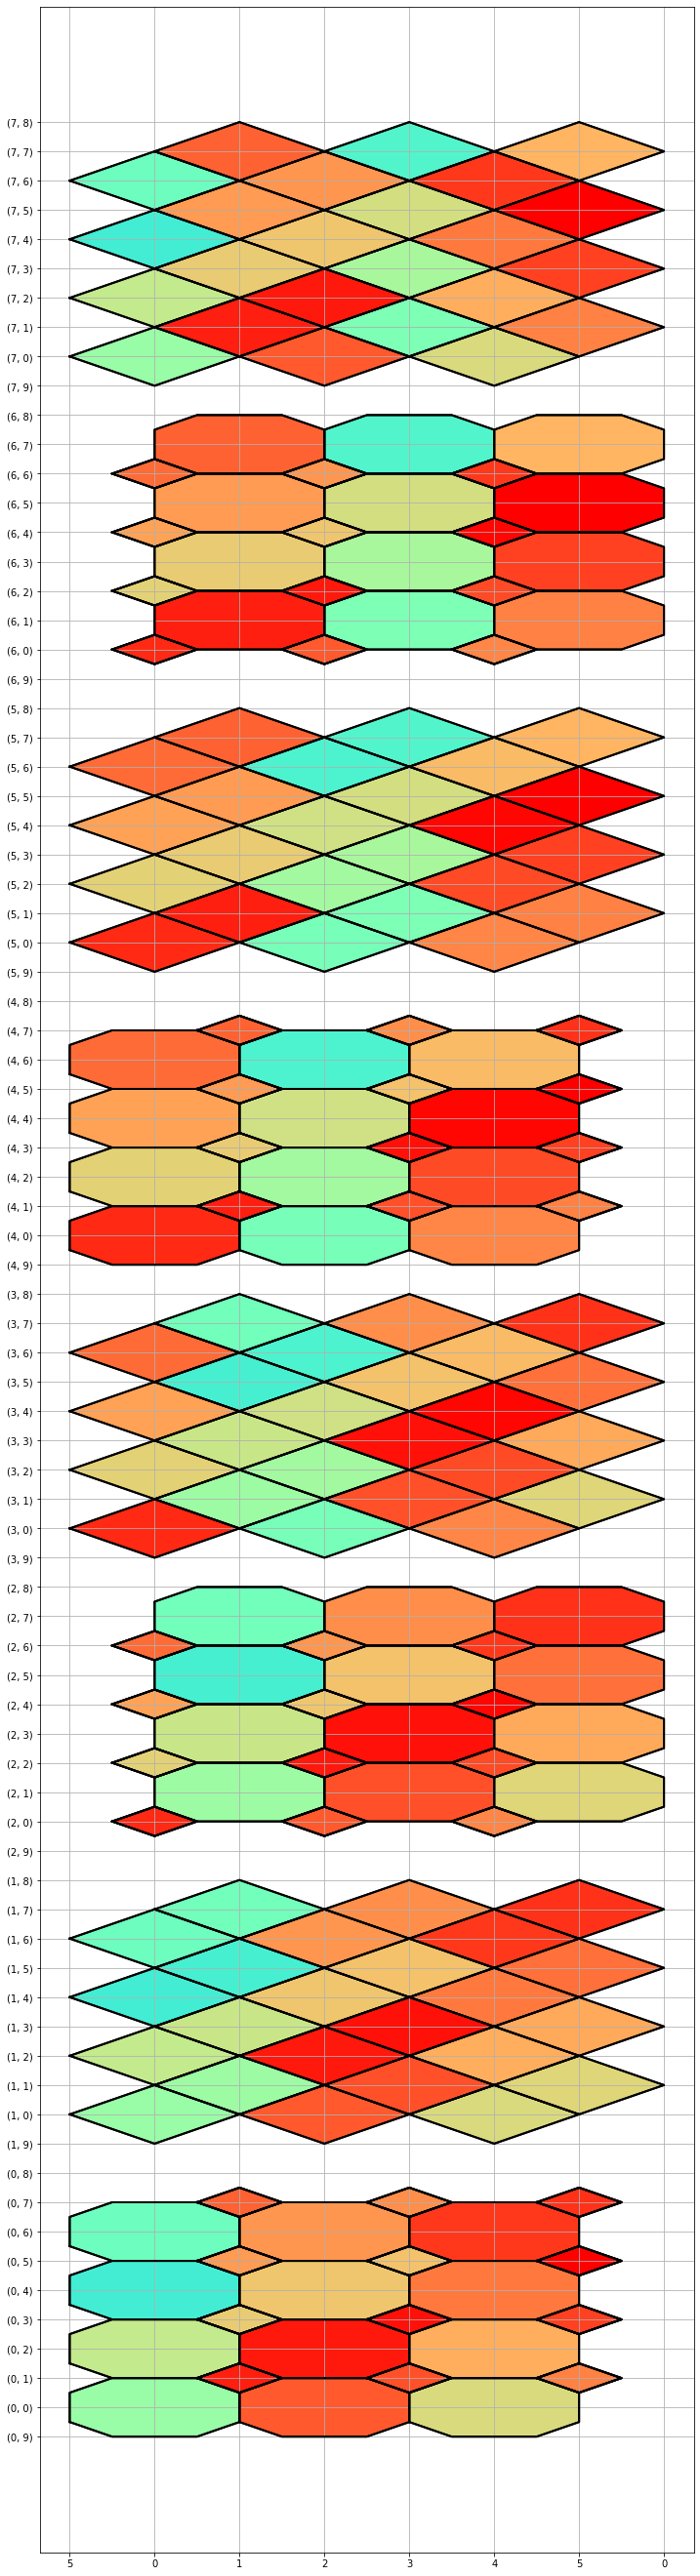

In [16]:
plt.figure(figsize=(12, 48))
tess.draw_filtration(colormap='rainbow', edgecolor='black')

plt.yticks(ticks=tess.yticks, labels=tess.ylabels)
plt.xticks(ticks=np.arange(-1, 2*n + 1), labels=np.arange(-1, 2*n + 1)%(2*n))
plt.grid(True)
plt.show()